# Simulation of performance of polarimeter

We define experimentally polarizers and waveplates (ideal and real) and determine the intensity.
This functions are for calibration.

For linear polarizer I have found a simple way to determine p0 and p1, but for retarder it is not so easy. 

With mathematica I have found several equations and I can check the performance.



## Init definitions

In [4]:
from __future__ import print_function, division

# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [5]:
import polarimeter

In [9]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, retarder, vacuum)

from polarimeter.polarimeter import get_polarimeter_parameters, polarimeter_matrices, rotate_polarimeter, polarimeter_matrix
from scipy import sin, cos,pi

from pprint import  pprint
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

## Numerical representation of polarizers and light

In [11]:
#Light source: circular polarization
u0=polarized_light(amplitude=1, angle=45 * degrees, phase=sp.pi/2, pol_degree=1)
print(u0)

[[1.]
 [0.]
 [0.]
 [1.]]


In [12]:
pol_param=get_polarimeter_parameters(kind='ideal')

pol_param

[{'p0': 0, 'p1': 1, 'theta_axis': 0},
 {'a': 1, 'b': 1, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1, 'b': 1, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'p0': 0, 'p1': 1, 'theta_axis': 0}]

In [13]:
# Use polarimeter parameters to generate Mueller Matrices

P = polarimeter_matrices(pol_param, angles=None)

for i in range(len(P)):
    print(P[i], end='\n\n')

[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]]

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]]

[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]



In [15]:
is_polarizer=[True,True, False,True]
angles=[0,0,0,0*degrees]
u0=polarized_light(amplitude=1,angle=45*degrees, phase=pi/4, pol_degree=1)

intensity_0, M = polarimeter_matrix(P, is_present=is_polarizer, angles=angles, u0=u0)

## 2 for loop

In [16]:
angles_2=sp.linspace(0, pi/2,11)
angles_4=sp.linspace(0, pi,11)

In [17]:
Angles_2, Angles_4 = sp.meshgrid(angles_2, angles_4)
Intensities=sp.zeros_like(Angles_2, dtype=float)

for i2, angle_2 in enumerate(angles_2):
    for i4, angle_4 in enumerate(angles_4):
        Intensities[i2,i4], _ = polarimeter_matrix(P, is_present=is_polarizer, 
                                                 angles=[0,angle_2,0,angle_4], u0=u0)

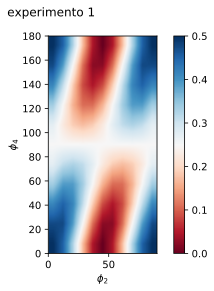

In [18]:
plt.figure()
extension=sp.array([angles_2[0], angles_2[-1], angles_4[0], angles_4[-1]])*180/pi
IDimage = plt.imshow(
    Intensities,
    interpolation='bilinear',
    aspect='auto',
    origin='lower',
    extent=extension)
plt.xlabel("$\phi_2$")
plt.ylabel("$\phi_4$")
plt.suptitle('experimento 1')
#plt.axis('scaled')
plt.axis(extension)
plt.axis('scaled')

# plt.axis('off')
plt.colorbar()
IDimage.set_cmap("RdBu") # YlGnBu  RdBu